Probability Density Functions
=============================

If you repeat a measurement many times, you will obtain a distribution of measurements determined by the physics of the measurement (this includes both the finite precision of your apparatus and any inherent randomness in the quantity being measured).  The shape of this distribution, normalised to a total area of 1, is called a **probability density function** or PDF.  For a continuous distribution, $P(x)\delta x$ represents the probability of measuring a value between $x$ and $x+\delta x$.

There are a few PDFs that commonly arise in experimental results:

* **the Gaussian distribution**, which we have already met &ndash; it is a continuous distribution valid for $-\infty < x < +\infty$;
* **the Poisson distribution**, which is defined only for positive integers and describes statistical noise on numbers of events (e.g. entries in one bin of a histogram, radioactive decays in a time interval $\ll$ the source half-life);
* **the binomial distribution**, which is defined only for positive integers and describes the results of yes/no trials (e.g. number of sixes in $N$ dice throws, number of heads in $N$ coin tosses, number of patients who recover after being treated with drug X).

The Gaussian distribution is particularly important because of a result called the **Central Limit Theorem**, which states that the distribution of the **mean** of a large number of measurements will be Gaussian, **independent** of the distribution of the individual measurements being averaged.  It is also the case, as shown below, that the Poisson and binomial distributions can be approximated by the Gaussian for sufficiently large numbers.

The code below plots a histogram of numbers drawn from a uniform pseudorandom distribution, and a histogram of means of such sets of random numbers.  The first histogram should be fairly flat &ndash; in fact, the variations from flatness are governed by the Poisson distribution &ndash; whereas the second histogram is clearly peaked around 0.5.

(array([   5.,   13.,   22.,   60.,  115.,  117.,   81.,   60.,   16.,   11.]),
 array([ 0.459577  ,  0.46707495,  0.47457289,  0.48207083,  0.48956878,
         0.49706672,  0.50456466,  0.5120626 ,  0.51956055,  0.52705849,
         0.53455643]),
 <a list of 10 Patch objects>)

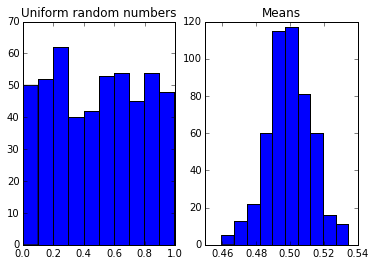

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

means = np.zeros(500)

for i in range(len(means)):
    s = np.random.uniform(0.0,1.0,500)
    means[i]=sum(s)/len(s)
    
plt.figure(1)
plt.subplot(121)
plt.title('Uniform random numbers')
plt.hist(s)
plt.subplot(122)
plt.title('Means')
plt.hist(means)

##The Gaussian, Poisson and Binomial PDFs

###The Gaussian distribution

The form of the Gaussian distribution is 
$$
P(x)\,\mathrm{d}x = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,\mathrm{d}x.
$$
It is a continuous distribution with mean $\mu$ and variance $\sigma^2$.  In the Gaussian, $\mu$ and $\sigma^2$ are independent parameters: a Gaussian with a given mean can have any standard deviation you choose, and vice versa.

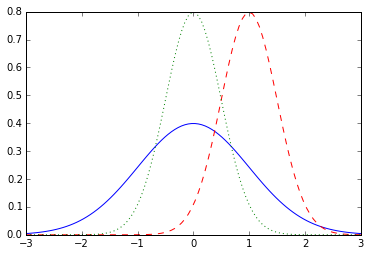

In [36]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

mu1 = 0.0
mu2 = 1.0
sigma1 = 1.0
sigma2 = 0.5
xmin = -3.0
xmax = +3.0
nbins=100
x=np.linspace(xmin,xmax,nbins)

plt.plot(x,gaussian(x,mu1,sigma1),'b',x,gaussian(x,mu2,sigma2),'r--',x,gaussian(x,mu1,sigma2),'g:')

###The Poisson distribution

The form of the Poisson distribution is
$$
P(k) = \frac{\mu^k e^{-k}}{k!}.
$$
Because of the factorial in the denominator, it is defined for positive integers only.  It has mean $\mu$ and variance $\mu$ (i.e. $\sigma=\sqrt{\mu}$).  In this distribution there is only one parameter: the variance is defined by the mean.

Note that although the function is only defined for integers, the mean $\mu$ can take any positive value: it is entirely legitimate to have a Poisson distribution with mean $\pi$, for example.

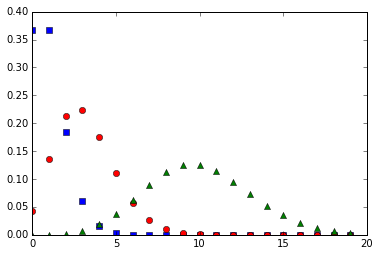

In [15]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np
import math as mt

def poisson(k,mu):
    return np.power(mu,k)*np.exp(-mu)/mt.factorial(k)

mu1 = 1.0
mu2 = 3.1415926
mu3 = 10.0
kmin = 0
kmax = 20
kk=np.arange(kmin,kmax,1)

for k in kk:
    plt.plot(k,poisson(k,mu1),'bs',k,poisson(k,mu2),'ro',k,poisson(k,mu3),'g^')

###The binomial distribution

The form of the binomial distribution is
$$
P(k) = \frac{n!}{k!(n-k)!}\,p^k (1-p)^{n-k}
$$
where $p$ is the probability of success in any individual trial and $n$ is the number of trials.  It has mean $np$ and 
variance $\sigma^2=np(1-p)$.  This distribution has two independent parameters, $n$ and $p$, which together define the mean and the standard deviation.  As with the Poisson distribution, it is only defined for positive integers $k$ and $n$, because of the factorials; $p$, being a probability, is a real number between 0 and 1.


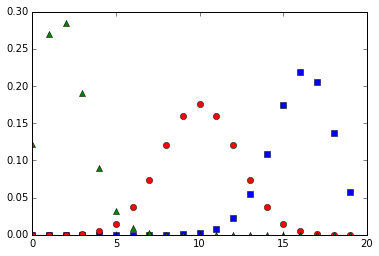

In [19]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np
import math as mt

def binomial(k,ntry,prob):
    if 0 <= k <= ntry:
        n = ntry
        nfak = 1
        kfak = 1
        for i in range(1,min(k,ntry-k)+1):
            nfak = nfak*n
            kfak = kfak*i
            n = n-1
        return nfak//kfak * np.power(prob,k) * np.power(1.0-prob,ntry-k)
    else:
        return 0

kmin = 0
kmax = 20
kk=np.arange(kmin,kmax,1)
n = kmax
p1 = 0.8
p2 = 0.5
p3 = 0.1

for k in kk:
    plt.plot(k,binomial(k,n,p1),'bs',k,binomial(k,n,p2),'ro',k,binomial(k,n,p3),'g^')

##Comparison of distributions

Both the Poisson distribution and the binomial distribution are markedly asymmetric at small $\mu$ and at small or large $p$ respectively.  However, for large $\mu$ the Poisson is well approximated by a Gaussian of mean and variance $\mu$ as shown below.

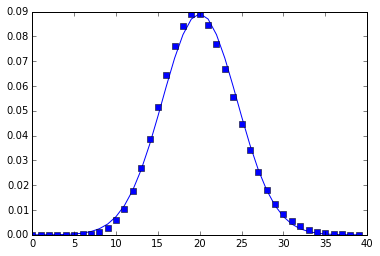

In [25]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np
import math as mt

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

def poisson(k,mu):
    return np.power(mu,k)*np.exp(-mu)/mt.factorial(k)

mu = 20.0
sigma = np.sqrt(mu)

kmin = 0
kmax = 40
kk=np.arange(kmin,kmax,1)

plt.plot(kk,gaussian(kk,mu,sigma))

for k in kk:
    plt.plot(k,poisson(k,mu),'bs')

The binomial distribution is most similar to the Gaussian when $p\simeq0.5$, but the range of values of $p$ for which the Gaussian is a good approximation widens as $n$ increases.  As a rule of thumb, the Gaussian is a good approximation whenever $np\geq 5$ *and* $n(1-p)\geq 5$.

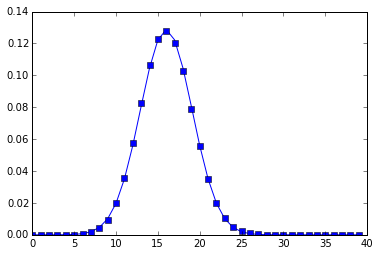

In [35]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np
import math as mt

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

def binomial(k,ntry,prob):
    if 0 <= k <= ntry:
        n = ntry
        nfak = 1
        kfak = 1
        for i in range(1,min(k,ntry-k)+1):
            nfak = nfak*n
            kfak = kfak*i
            n = n-1
        return nfak//kfak * np.power(prob,k) * np.power(1.0-prob,ntry-k)
    else:
        return 0

kmin = 0
kmax = 40
kk=np.arange(kmin,kmax,1)
n = kmax
p = 0.4
mu = n*p
sigma = np.sqrt(n*p*(1.0-p))

plt.plot(kk,gaussian(kk,mu,sigma))

for k in kk:
    plt.plot(k,binomial(k,n,p),'bs')

The Poisson and binomial distributions are very similar for the case in which $p$ is small &ndash; in fact, the Poisson distribution is the limit of the binomial distribution for large $n$ and small $p$.  (This is quite easy to prove; see, for example, [this page](http://www.oxfordmathcenter.com/drupal7/node/297).)  This can be useful, because the Poisson distribution is easier to work with than the binomial.

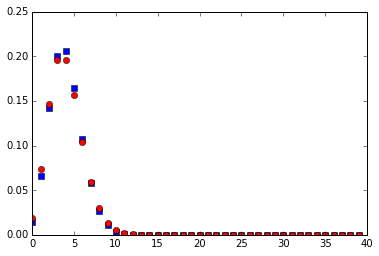

In [43]:
%matplotlib inline

import matplotlib.pyplot as p
import numpy as np
import math as mt

def poisson(k,mu):
    return np.power(mu,k)*np.exp(-mu)/mt.factorial(k)

def binomial(k,ntry,prob):
    if 0 <= k <= ntry:
        n = ntry
        nfak = 1
        kfak = 1
        for i in range(1,min(k,ntry-k)+1):
            nfak = nfak*n
            kfak = kfak*i
            n = n-1
        return nfak//kfak * np.power(prob,k) * np.power(1.0-prob,ntry-k)
    else:
        return 0

kmin = 0
kmax = 40
kk=np.arange(kmin,kmax,1)
n = kmax
p = 0.1
mu = n*p

for k in kk:
    plt.plot(k,binomial(k,n,p),'bs',k,poisson(k,mu),'ro')

##Other PDFs

Although the Gaussian, Poisson and binomial distributions are the most common, there are many other statistical distributions that you might meet.  One particularly nasty specimen is the **Cauchy distribution**, more commonly known in astronomy as the **Lorentzian** and in particle physics as the **Breit-Wigner**: it describes the shape of a spectral line dominated by natural broadening, or the mass peak of a strongly decaying particle.  The form of the Cauchy distribution is 
$$
P(x)\,\mathrm{d}x = \frac{1}{\pi\gamma}\left[\frac{\gamma^2}{(x-\mu)^2+\gamma^2}\right],
$$
where $\mu$ is the position of the peak and $2\gamma$ is the full width at half maximum.   

The code below compares the Cauchy distribution (blue) to a Gaussian with the same full width at half maximum (red).

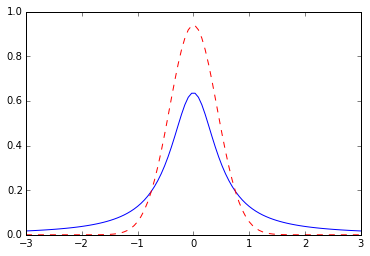

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def cauchy(x,mu,gamma):
    return (gamma*gamma/((x-mu)*(x-mu)+gamma*gamma))/(np.pi*gamma)

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(2.50663*sigma)

mu = 0.0
gamma = 0.5
sigma = gamma/np.sqrt(2*np.log(2))
scale = 1
#scale = np.sqrt(2/np.pi)*sigma/gamma #uncomment this line to scale the Gaussian to the same height as the Cauchy
xmin = -3.0
xmax = +3.0
nbins=100
x=np.linspace(xmin,xmax,nbins)

plt.plot(x,cauchy(x,mu,gamma),'b',x,scale*gaussian(x,mu,sigma),'r--')

The Cauchy distribution has much wider wings than the Gaussian.  In fact, the wings are so wide that they have a rather pathological effect: although it seems intuitively obvious that the mean of the Cauchy distribution is $\mu$, the position of the peak, in fact the formal definition of the expectation value
$$
\langle x \rangle = \int\limits_{-\infty}^{+\infty} x P(x)\,\mathrm{d}x
$$
is undefined when $P(x)$ is the Cauchy distribution (the limits diverge logarithmically).  The variance is also undefined, as are all higher moments.

This property makes the Cauchy distribution very difficult to fit.  Unless the initial guess is very close to the true parameters, the fit has a tendency not to converge.